In [ ]:
# !pip install chart_studio
# !pip install cufflinks
# !pip install plotly
# !pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.8 MB/s eta 0:00:00


### RFM Analsis


RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.
> 
* Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
* Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
* Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

Here, Each of the three variables(Recency, Frequency, and Monetary) consists of four equal groups, which creates 64 (4x4x4) different customer segments.

Steps of RFM(Recency, Frequency, Monetary):

1. Calculate the Recency, Frequency, Monetary values for each customer.
2. Add segment bin values to RFM table using quartile.
3. Sort the customer RFM score in ascending order.

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 5. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. 

Recency: the maximum of "10 – the number of months that have passed since the customer last purchased" and 1

Frequency: the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 5)" and 1

Monetary: the highest value of all purchases by the customer expressed as a multiple of some benchmark value
Note: The formulas that we used in this notebook are different from the main. I will explain Recency, Frequency and Monetary formulas that we used in this notebook.

---



In [2]:

import numpy     as np
import pandas    as pd

# Options for pandas
pd.options.display.max_columns = 30

import matplotlib.pyplot as plt
import seaborn   as sns
import pylab
import calendar
from   scipy import stats as sci
import missingno as msno
from   datetime import datetime

# Standard plotly imports
# import chart_studio.plotly as py
# import plotly.graph_objs   as go
# from   plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)

# Set global theme
# cufflinks.set_config_file(world_readable=True, theme="pearl")

# Display all cell outputs
# from IPython.core.interactiveshell import InteractiveShell

# InteractiveShell.ast_node_interactivity = "all"

# import plotly.io as pio
# pio.renderers.default = "colab"

# Warnings
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

# Drive connect to get the data.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Data Loading exported From Notebook2 data_preprocssing


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ecommerce Behavior Project/data_preprocessed.csv')


In [4]:
df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,count_user,count_brand,count_event_tye,count_product,count_session,count_sessions_type,...,view,no_purchase,yes_purchase,accessories.bag,accessories.cosmetic_bag,apparel.glove,appliances.environment.air_conditioner,appliances.environment.vacuum,appliances.personal.hair_cutter,furniture.bathroom.bath,furniture.living_room.cabinet,furniture.living_room.chair,other,sport.diving,stationery.cartrige
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,58,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,46,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,other,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,95,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,other,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,7,277330,2544192,767,27.0,7.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,other,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,34,24299,2544192,482,55.0,5.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738115,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738116,2019-11-30 23:59:24 UTC,remove_from_cart,5608703,1487580005553668971,other,matrix,9.52,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e,7,4425,1687591,651,10.0,6.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738117,2019-11-30 23:59:37 UTC,view,5699730,1487580004882580302,other,estel,2.70,422196217,dd6d8240-0896-4965-9344-110648581a51,20,119933,3938296,191,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8738118,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,other,ellips,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,5,2862,3938296,1469,2.0,2.0,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


##### Quantity calculation

the quantity column is a column we have added to determine the customer loyalty to this brand or product, based on the amount the customer has purchased of this product on this day.

In [ ]:
# RFM Analysis
purchases = df[df["event_type"] == "purchase"]
purchases_by_user = purchases.groupby(["user_id", "product_id",'date',]).agg({"price": "sum", "event_type": "count"}).reset_index()
purchases_by_user = purchases_by_user.rename(columns={"event_type" : "quantity"})
purchases_by_user

,user_id,product_id,date,price,quantity
0,9794320,5724621,2019-11-25,2.48,1
1,9794320,5809910,2019-11-25,5.24,1
2,9794320,5811668,2019-11-25,2.48,1
3,9794320,5812033,2019-11-25,2.48,1
4,10079204,5614842,2019-11-06,13.56,1
...,...,...,...,...,...
560941,579925377,5759491,2019-11-30,1.83,1
560942,579925377,5810673,2019-11-30,9.29,1
560943,579925377,5813882,2019-11-30,1.41,1
560944,579925377,5837126,2019-11-30,2.86,1


In [ ]:
# how many time of sales for each product
purchases_by_user.groupby('product_id').agg({'quantity':"sum"}).sort_values('quantity',ascending=False)

,quantity
product_id,
5809910,2449
5854897,1865
5751422,1578
5700037,1568
5802432,1445
...,...
5830785,1
5830788,1
5830790,1


as we can see the product that has id number 5809910 repeated 2449 times 

In [ ]:
# get the total price by multiply Quantity in price 
purchases_by_user['total_price']=purchases_by_user['quantity']*purchases_by_user['price']


In [ ]:
purchases_by_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560946 entries, 0 to 560945
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      560946 non-null  int64  
 1   product_id   560946 non-null  int64  
 2   date         560946 non-null  object 
 3   price        560946 non-null  float64
 4   quantity     560946 non-null  int64  
 5   total_price  560946 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 25.7+ MB


In [ ]:
purchases_by_user['quantity'].value_counts()

1    554173
2      6473
3       279
4        20
5         1
Name: quantity, dtype: int64

As we can see most people buy only one product and this reoresent around 97% of the customer 

In [ ]:
# get today date 
import datetime as dt
purchases_by_user['date'].max()

'2019-11-30'

In [ ]:
today_date = dt.datetime(2019,12,1)
today_date

datetime.datetime(2019, 12, 1, 0, 0)

In [ ]:
rfm = purchases_by_user.groupby('user_id').agg({
    'date': lambda date: (today_date - pd.to_datetime(date.max())).days,
    'product_id': lambda num: num.nunique(),
    'total_price': lambda total_price: total_price.sum()
})
rfm

,date,product_id,total_price
user_id,,,
9794320,6,4,12.68
10079204,25,2,25.81
10280338,10,15,54.83
15781728,15,2,20.31
19762782,21,8,80.29
...,...,...,...
579906406,1,2,9.68
579916096,1,4,9.42
579924768,1,3,8.54


In [ ]:
# rfm =purchases_by_user.groupby('user_id').agg({'event_time':lambda date :(today_date - date.max()).days,
#                                            'product_id': lambda num : num.nunique(),
#                                            'total_price': lambda total_price : total_price.sum()})
# rfm.columns=[['frequency','recency','monetary']]

In [ ]:
rfm.columns=[['frequency','recency','monetary']]
rfm

,frequency,recency,monetary
user_id,,,
9794320,6,4,12.68
10079204,25,2,25.81
10280338,10,15,54.83
15781728,15,2,20.31
19762782,21,8,80.29
...,...,...,...
579906406,1,2,9.68
579916096,1,4,9.42
579924768,1,3,8.54


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
frequency,52523.0,26.382461,18.258461,1.00,9.00,24.0,42.00,61.0
recency,52523.0,10.465282,13.183496,1.00,3.00,6.0,13.00,430.0
monetary,52523.0,53.795423,74.422805,-44.78,16.68,33.8,60.12,3204.1


In [ ]:
rfm['recency_score']=pd.qcut(np.ravel(rfm['recency'].rank(method='first')),q=5,labels=[5,4,3,2,1], duplicates='drop')

In [ ]:
rfm['frequency_score'] = pd.qcut(np.ravel(rfm['frequency'].rank(method='first')), q=5, labels=[1,2,3,4,5], duplicates='raise') 

In [ ]:
rfm['monetary_score']=pd.qcut(np.ravel(rfm['monetary'].rank(method='first')),q=5,labels=[1,2,3,4,5], duplicates='raise') 

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52523 entries, 9794320 to 579944216
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   (frequency,)        52523 non-null  int64   
 1   (recency,)          52523 non-null  int64   
 2   (monetary,)         52523 non-null  float64 
 3   (recency_score,)    52523 non-null  category
 4   (frequency_score,)  52523 non-null  category
 5   (monetary_score,)   52523 non-null  category
dtypes: category(3), float64(1), int64(2)
memory usage: 1.8 MB


In [ ]:
# rfm['fm_score'] = np.round((rfm['recency_score'].astype(int).values.reshape(-1,1) + rfm['monetary_score'].astype(int).values.reshape(-1,1))/2).astype(str).reshape(-1,1)

In [ ]:
rfm['rfm_score']=rfm['recency_score'].astype(str).values.reshape(-1,1) + rfm['frequency_score'].astype(str).values.reshape(-1,1)

In [ ]:
#rfm['rfm_score']=rfm['recency_score'].astype(str).values.reshape(-1,1) + rfm['frequency_score'].astype(str).values.reshape(-1,1) + rfm['monetary_score'].astype(str).values.reshape(-1,1)


In [ ]:
rfm

,frequency,recency,monetary,recency_score,frequency_score,monetary_score,rfm_score
user_id,,,,,,,
9794320,6,4,12.68,4,1,1,41
10079204,25,2,25.81,5,3,3,53
10280338,10,15,54.83,2,2,4,22
15781728,15,2,20.31,5,2,2,52
19762782,21,8,80.29,3,3,5,33
...,...,...,...,...,...,...,...
579906406,1,2,9.68,5,1,1,51
579916096,1,4,9.42,4,1,1,41
579924768,1,3,8.54,4,1,1,41


#### Customer Segmentation
> Dividing the data into clusters based on common characteristics to:
1.  identifying the most potential customers.
2. easily communicate with a targetted group of the audience.
3. improves the quality of service, loyalty, and retention.
4. Improve customer relationship via better understanding needs of segments.

In [ ]:
# segment customer using rfm score 
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['rfm_segment'] = rfm['rfm_score'].replace(seg_map,regex=True)
rfm

,frequency,recency,monetary,recency_score,frequency_score,monetary_score,rfm_score,rfm_segment
user_id,,,,,,,,
9794320,6,4,12.68,4,1,1,41,Promising
10079204,25,2,25.81,5,3,3,53,Potential Loyalists
10280338,10,15,54.83,2,2,4,22,Hibernating
15781728,15,2,20.31,5,2,2,52,Potential Loyalists
19762782,21,8,80.29,3,3,5,33,Need Attention
...,...,...,...,...,...,...,...,...
579906406,1,2,9.68,5,1,1,51,New Customers
579916096,1,4,9.42,4,1,1,41,Promising
579924768,1,3,8.54,4,1,1,41,Promising


This code defines a dictionary that maps the conditions for assigning RFM segments based on r_score and fm_score values. The rfm_segment function uses this dictionary to assign an RFM segment to each row in the DataFrame.




In [ ]:
rfm.to_csv('Ecommerce_RFM_Analysis.csv')
from google.colab import files
files.download('Ecommerce_RFM_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Distribution of recency')

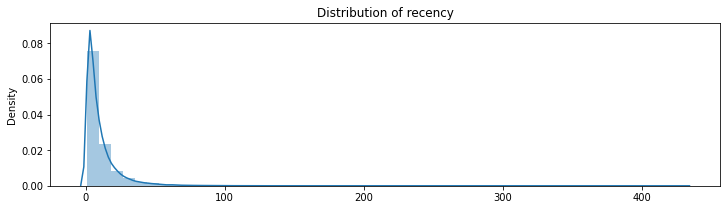

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Distribution of frequency')

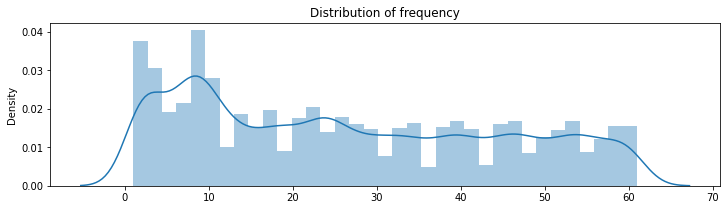

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Distribution of monetary')

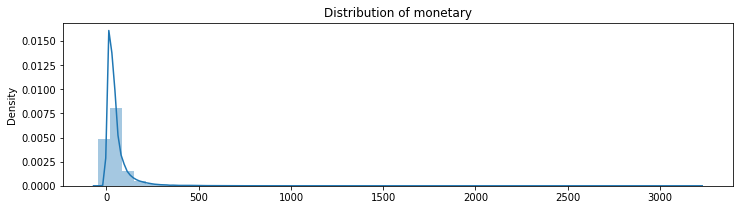

In [ ]:
colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()